In [1]:
import myComponents as tc
import topic as tp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random

In [6]:
avg_sub_size = 10.0
avg_pub_size = 20.0
broker_rates = [5*100]*10
sub_rates = [3]*6
pub_rates = [3]*6
monitor_rate = 1
topic_dist = [3,2,2]
runtime = 100
seed = 1
connection_style = None

PF


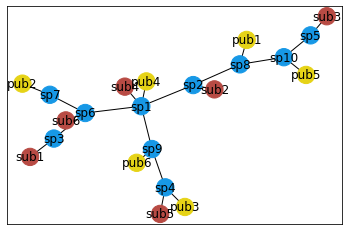

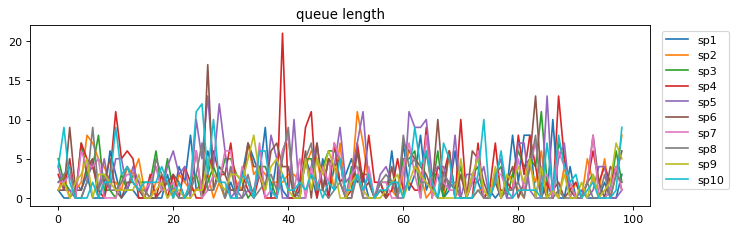

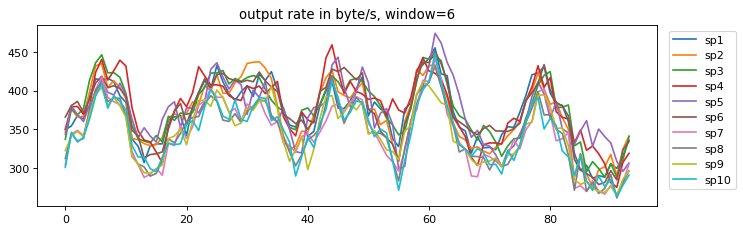

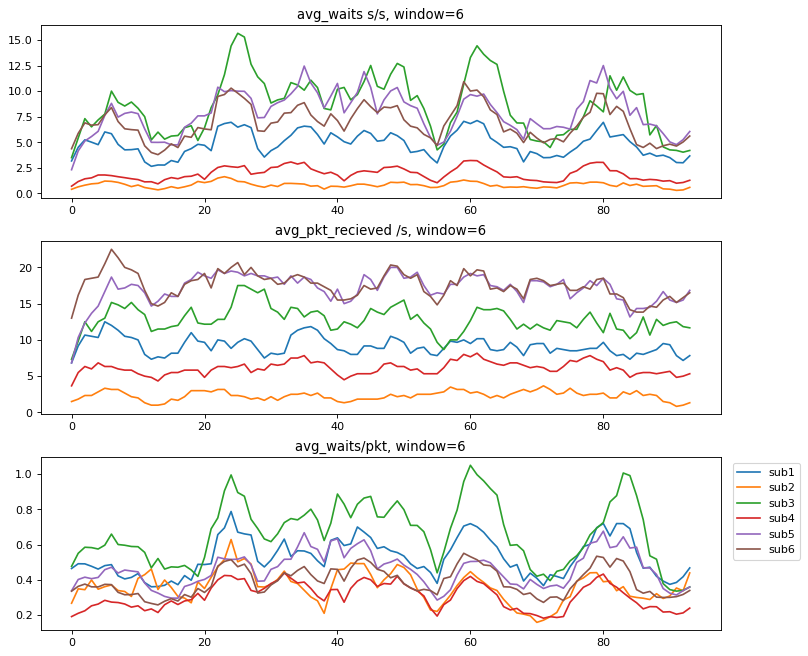

In [7]:
tc.SwitchPort.mode = 'PF'
total_topic = tp.TopicTree()
total_topic.random_construct(topic_dist, seed)
#total_topic.visualize(total_topic.root)
net = tc.Network(total_topic, avg_sub_size, avg_pub_size)
net.initialize_nodes(broker_rates, sub_rates, pub_rates, monitor_rate, seed)
net.establish_topology(seed)
net.connect_client(connection_style, seed)
net.env.run(runtime)
print(tc.SwitchPort.mode)
net.visualize()
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_length, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue length")
window = 6
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    a = np.array(monitor.bytes_sent)
    b = np.array([0]*window+monitor.bytes_sent[0:-window])
    plt.plot((a-b)[window-1:]/window/monitor_rate, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("output rate in byte/s, window="+str(window))
import warnings
warnings.filterwarnings('ignore')
window = 6
plt.figure(figsize=(10, 9), dpi=80)

for i in range(len(net.sub_monitor_list)):
    monitor = net.sub_monitor_list[i]
    a = np.array(monitor.packets_rec)
    b = np.array([0]*window+monitor.packets_rec[0:-window])
    avg_packet_rec_per_time = (a-b)[window-1:]/window/monitor_rate
    
    a = np.array(monitor.tot_waits)
    b = np.array([0]*window+monitor.tot_waits[0:-window])
    avg_waits_per_time = (a-b)[window-1:]/window/monitor_rate
    

    plt.subplot(311)
    plt.plot(avg_waits_per_time, label=monitor.client.client_id)
    plt.subplot(312)
    plt.plot(avg_packet_rec_per_time, label=monitor.client.client_id)
    plt.subplot(313)
    plt.plot(avg_waits_per_time/avg_packet_rec_per_time, label=monitor.client.client_id)

plt.subplot(311)
plt.title("avg_waits s/s, window="+str(window))
plt.subplot(312)
plt.title("avg_pkt_recieved /s, window="+str(window))
plt.subplot(313)
plt.title("avg_waits/pkt, window="+str(window))
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

Text(0.5, 1.0, 'queue length')

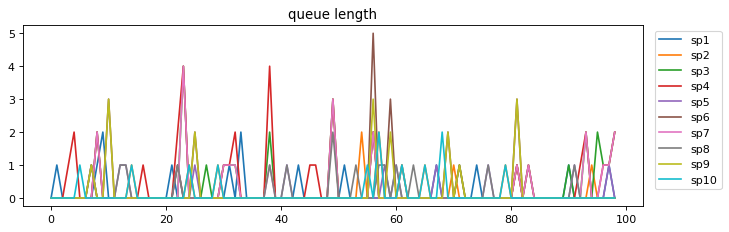

In [13]:
plt.figure(figsize=(10, 3), dpi=80)
#monitor.queue_size
#monitor.queue_length
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.queue_length, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("queue length")

Text(0.5, 1.0, 'output rate in byte/s, window=6')

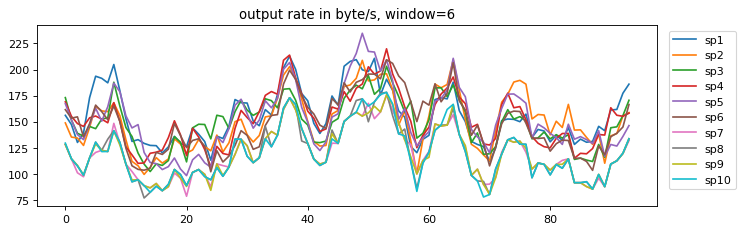

In [18]:
window = 6
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    a = np.array(monitor.bytes_sent)
    b = np.array([0]*window+monitor.bytes_sent[0:-window])
    plt.plot((a-b)[window-1:]/window/monitor_rate, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("output rate in byte/s, window="+str(window))

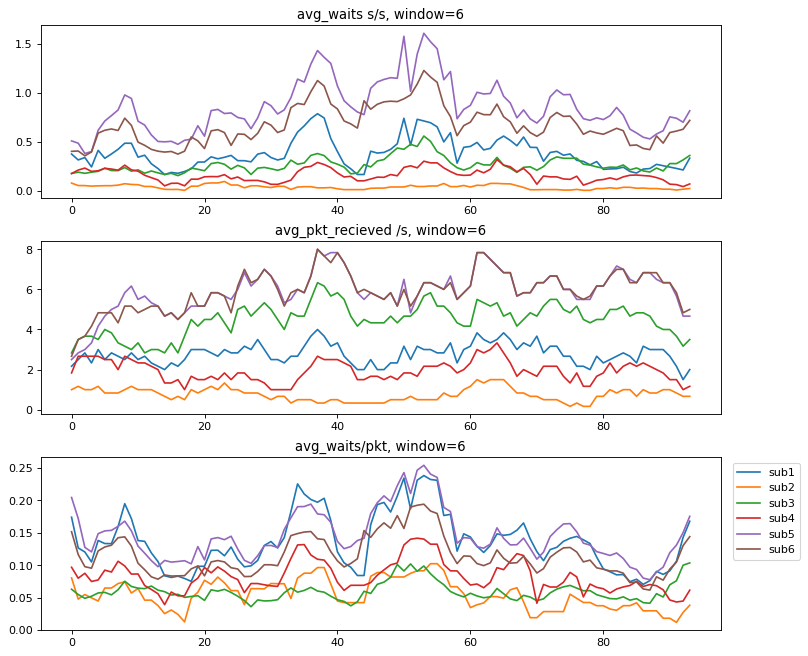

In [21]:
import warnings
warnings.filterwarnings('ignore')
window = 6
plt.figure(figsize=(10, 9), dpi=80)

for i in range(len(net.sub_monitor_list)):
    monitor = net.sub_monitor_list[i]
    a = np.array(monitor.packets_rec)
    b = np.array([0]*window+monitor.packets_rec[0:-window])
    avg_packet_rec_per_time = (a-b)[window-1:]/window/monitor_rate
    
    a = np.array(monitor.tot_waits)
    b = np.array([0]*window+monitor.tot_waits[0:-window])
    avg_waits_per_time = (a-b)[window-1:]/window/monitor_rate
    

    plt.subplot(311)
    plt.plot(avg_waits_per_time, label=monitor.client.client_id)
    plt.subplot(312)
    plt.plot(avg_packet_rec_per_time, label=monitor.client.client_id)
    plt.subplot(313)
    plt.plot(avg_waits_per_time/avg_packet_rec_per_time, label=monitor.client.client_id)

plt.subplot(311)
plt.title("avg_waits s/s, window="+str(window))
plt.subplot(312)
plt.title("avg_pkt_recieved /s, window="+str(window))
plt.subplot(313)
plt.title("avg_waits/pkt, window="+str(window))
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,wspace=0.35)

Text(0.5, 1.0, 'average input rate byte/second')

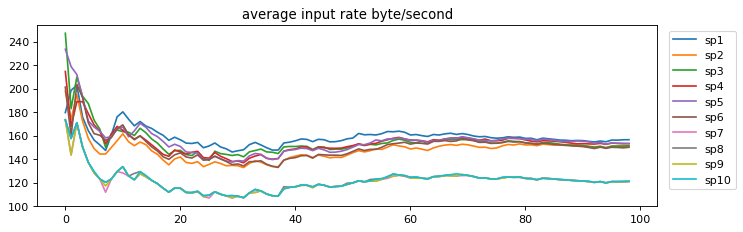

In [22]:
plt.figure(figsize=(10, 3), dpi=80)
for i in range(len(net.broker_monitor_list)):
    monitor = net.broker_monitor_list[i]
    plt.plot(monitor.input_rate, label=monitor.port.sp_id)
plt.legend(bbox_to_anchor=(1.01, 1),loc='upper left')
plt.title("average input rate byte/second")

In [6]:
net.broker_list[2].topic_tree.match_branch('a2/+/c0')[0].visualize()

TopicNode: root --> a2 --> + --> c0 ['sub1']


In [12]:
tree = tp.TopicTree()

In [13]:
tree.add_branch('a1/b1/c1')
tree.add_branch('a1/+/c1')
tree.add_branch('a1/#')
tree.add_branch('a1/+/#')

1

In [14]:
tree.visualize()

root: []
   |__a1: []
      |__b1: []
         |__c1: []
      |__+: []
         |__c1: []
         |__#: []
      |__#: []


In [18]:
result, delay = tree.match_branch('a1/b1/c1')

In [19]:
for node in result:
    node.visualize()

TopicNode: root --> a1 --> # []
TopicNode: root --> a1 --> + --> # []
TopicNode: root --> a1 --> b1 --> c1 []
TopicNode: root --> a1 --> + --> c1 []


In [11]:
tree.add_branch('a1/#')

In [20]:
broker = net.broker_list[2]
broker.topic_tree.visualize()

root: []
   |__+: ['sp6', 'sub1']
      |__b2: ['sp6']
         |__#: ['sp6']
      |__b3: ['sp6']
         |__#: ['sp6', 'sub1']
         |__c3: ['sp6']
      |__b1: ['sp6']
   |__a2: ['sp6']
      |__b3: ['sp6']
         |__c0: ['sub1', 'sp6']
         |__c1: ['sp6']
         |__#: ['sp6']
         |__c3: ['sp6']
      |__+: ['sp6']
         |__c0: ['sub1']
         |__c1: ['sp6']
         |__c3: ['sp6']
      |__b1: ['sp6']
         |__c2: ['sp6']
         |__#: ['sp6']
         |__c0: ['sp6']
      |__#: ['sp6']
      |__b0: ['sp6']
         |__c3: ['sp6']
         |__#: ['sp6']
         |__c1: ['sp6']
   |__a4: ['sp6']
      |__+: []
         |__c0: ['sp6']
         |__c1: ['sp6']
      |__b1: ['sp6']
         |__#: ['sp6']
         |__c0: ['sp6']
      |__#: ['sp6']
      |__b3: ['sp6']
         |__c3: ['sp6']
   |__a5: ['sp6']
      |__+: []
         |__c2: ['sub1', 'sp6']
         |__c3: ['sp6']
      |__b2: ['sp6']
         |__c0: ['sp6']
         |__c1: ['sp6']
      |__b3: [